pass ms公式

$$ T_{start}-T_{end} $$

MAE公式

$$ \frac{1}{N}\sum_{i=1}^{n} \mid f_i-y_i \mid $$

MSE公式

$$ \frac{1}{N}\sum_{i=1}^{n} (f_i-y_i)^2 $$

导入相关包

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import params
import utils
#自定义处理方法
import processor


%matplotlib inline


Using TensorFlow backend.


### 探索数据集

查看视频文件

shape:


(720, 1280, 3)

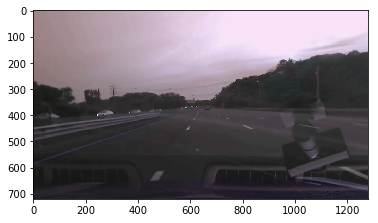

In [2]:
cap = cv2.VideoCapture(processor.get_front_file(1))
ret, frame = cap.read()
cap.release()
plt.imshow(frame)
#shape
print('shape:')
frame.shape

查看转向数据文件

In [3]:
wheel01 = utils.fetch_csv_data(processor.get_steering_file(1))
wheel01.head(10)

,ts_micro,frame,wheel
0,1464650070285914,0,-1.0
1,1464650070319247,1,-1.0
2,1464650070352581,2,-1.0
3,1464650070385914,3,-1.0
4,1464650070419247,4,-1.0
5,1464650070452581,5,-1.0
6,1464650070485914,6,-1.0
7,1464650070519247,7,-1.0
8,1464650070552581,8,-1.0
9,1464650070585914,9,-1.5


查看合并数据集

Records in epoch01_steering.csv : 1500
Records in epoch02_steering.csv : 3900
Records in epoch03_steering.csv : 2700
Records in epoch04_steering.csv : 2700
Records in epoch05_steering.csv : 2700
Records in epoch06_steering.csv : 2700
Records in epoch07_steering.csv : 2700
Records in epoch08_steering.csv : 2700
Records in epoch09_steering.csv : 2700
Records in epoch10_steering.csv : 2700
Total records from epoch01 to epoch10 : 27000


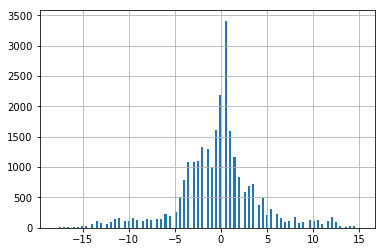

In [4]:
processor.check_dataset(1,10)

读取图片

In [22]:
def show_img(img):
    plt.imshow(img)
    plt.show()

Records in epoch01_steering.csv : 1500
Wheel of frame 1173 : 4.5


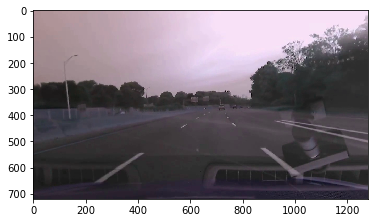

In [5]:

    
# load
sample_img = utils.imread(utils.join_dir(params.parent_path+'/images/img','frame_1173.jpg'))
epoch1 = processor.get_combine_dataset(1,1)
sample_sig = epoch1[1173]
print('Wheel of frame 1173 : '+str(sample_sig))
#show
show_img(sample_img)

改变色域

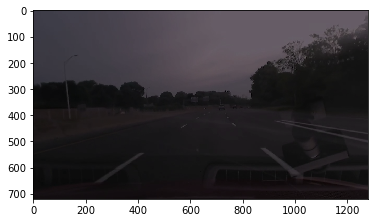

In [33]:
def change_color_space(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img[:, :, 2] = img[:, :, 2] *np.random.uniform(0.1,1)
    return cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

sample_img=utils.imread(utils.join_dir(params.parent_path+'/images/img','frame_1173.jpg'))
#sample_img=processor.change_color_space(sample_img)
sample_img=change_color_space(sample_img)
show_img(sample_img)

平移图像

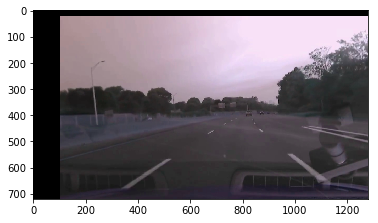

In [62]:
sample_img=utils.imread(utils.join_dir(params.parent_path+'/images/img','frame_1173.jpg'))
sample_img=processor.translate(sample_img)
show_img(sample_img)

缩放图像

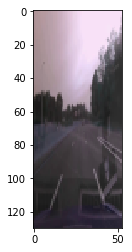

In [63]:
sample_img=utils.imread(utils.join_dir(params.parent_path+'/images/img','frame_1173.jpg'))
sample_img=processor.resize(sample_img)
show_img(sample_img)

### Checkpoint 1 is here

In [1]:
import processor
import params
import numpy as np
import modelcoder
import utils

Using TensorFlow backend.


分批读取数据集

In [2]:
all_features,all_labels = processor.load_dataset(1,2,need_ori=True)

Start to load datasets...
Processing epoch01>>>
Frames in features01.p : 3000
Records in labels01.p : 3000
Done
Length of features : 3000, length of labels : 3000


Start to create model
Model created
Start to split datasets
Split completed
Split result=========================
Shape of trainning set
(2400, 64, 64, 3) (2400, 1)
Shape of test set
(600, 64, 64, 3) (600, 1)
Start training
Train on 1920 samples, validate on 480 samples
Epoch 1/10
1920/1920 [==============================] - 3s - loss: 10.7311 - val_loss: 10.9155
Epoch 2/10
1920/1920 [==============================] - 2s - loss: 10.4358 - val_loss: 10.9116
Epoch 3/10
1920/1920 [==============================] - 2s - loss: 10.4403 - val_loss: 10.9126
Epoch 4/10
1920/1920 [==============================] - 2s - loss: 10.4331 - val_loss: 10.9173
Epoch 5/10
1920/1920 [==============================] - 2s - loss: 10.4245 - val_loss: 10.9197
Epoch 6/10
1920/1920 [==============================] - 2s - loss: 10.4169 - val_loss: 10.9325
Epoch 7/10
1920/1920 [==============================] - 2s - loss: 10.4323 - val_loss: 10.9358
Epoch 8/10
1920/1920 [==============================] - 2s - los

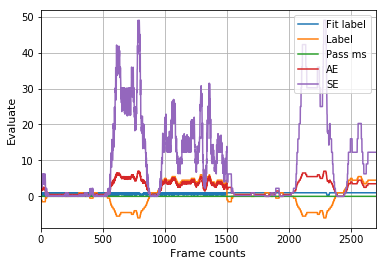

Mean absolute error is 2.564262860799829
Mean squared  error is 10.392369138270519
Mean pass ms is 0.0013897053400675455


In [3]:
model = modelcoder.get_nvidia_model()
fitted_model = processor.fit_model(all_features,all_labels,model,epochs=10)
processor.evaluate_final_model(model,all_features,all_labels)

Start to create model
Model created
Start to split datasets
Split completed
Split result=========================
Shape of trainning set
(2400, 64, 64, 3) (2400, 1)
Shape of test set
(600, 64, 64, 3) (600, 1)
Start training
Train on 1920 samples, validate on 480 samples
Epoch 1/100
1920/1920 [==============================] - 5s - loss: 10.7086 - val_loss: 11.0165
Epoch 2/100
1920/1920 [==============================] - 3s - loss: 10.3912 - val_loss: 11.0466
Epoch 3/100
1920/1920 [==============================] - 3s - loss: 10.3319 - val_loss: 10.7625
Epoch 4/100
1920/1920 [==============================] - 3s - loss: 10.2305 - val_loss: 10.7326
Epoch 5/100
1920/1920 [==============================] - 3s - loss: 10.0138 - val_loss: 10.4729
Epoch 6/100
1920/1920 [==============================] - 3s - loss: 9.6910 - val_loss: 10.5802
Epoch 7/100
1920/1920 [==============================] - 3s - loss: 9.4829 - val_loss: 10.4650
Epoch 8/100
1920/1920 [==============================] - 3s

1920/1920 [==============================] - 3s - loss: 0.3082 - val_loss: 9.2432
Epoch 85/100
1920/1920 [==============================] - 3s - loss: 0.2728 - val_loss: 8.9920
Epoch 86/100
1920/1920 [==============================] - 3s - loss: 0.2602 - val_loss: 8.9990
Epoch 87/100
1920/1920 [==============================] - 3s - loss: 0.2419 - val_loss: 8.8450
Epoch 88/100
1920/1920 [==============================] - 3s - loss: 0.2289 - val_loss: 8.6954
Epoch 89/100
1920/1920 [==============================] - 3s - loss: 0.2114 - val_loss: 8.9356
Epoch 90/100
1920/1920 [==============================] - 3s - loss: 0.1976 - val_loss: 8.9008
Epoch 91/100
1920/1920 [==============================] - 3s - loss: 0.2016 - val_loss: 8.8784
Epoch 92/100
1920/1920 [==============================] - 3s - loss: 0.2113 - val_loss: 8.8187
Epoch 93/100
1920/1920 [==============================] - 3s - loss: 0.2039 - val_loss: 8.8004
Epoch 94/100
1920/1920 [==============================] - 3s - 

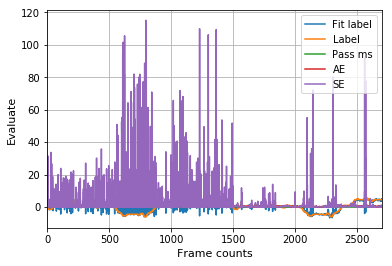

Mean absolute error is 0.9416677967685585
Mean squared  error is 3.4652752820822132
Mean pass ms is 0.005268102645874024


In [52]:
from keras.layers.pooling import MaxPooling2D 
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation,Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Flatten
from keras import optimizers
import params

def get_nvidia_model_2():
    print("Start to create model")
    model = Sequential()
    model.add(Lambda(lambda x:x/255., input_shape=(params.FLAGS.img_h, params.FLAGS.img_w, params.FLAGS.img_c)))
    model.add(BatchNormalization())
    model.add(Convolution2D(24,(5,5), activation='elu', strides=(2,2), padding='same'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(36,(5,5), activation='elu', strides=(2,2), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(48,(5,5), activation='elu', strides=(2,2), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64,(3,3), activation='elu', strides=(1,1), padding='same'))
    model.add(MaxPooling2D(pool_size=(1, 1)))
    model.add(Convolution2D(64,(3,3), activation='elu', strides=(1,1), padding='same'))
    model.add(MaxPooling2D(pool_size=(1, 1)))
    
    model.add(Flatten())
    
    model.add(Dense(1164, activation='elu'))
    model.add(Dropout(0.25))
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='Adam')
    print("Model created")
    return model

model = get_nvidia_model_2()
fitted_model = processor.fit_model(all_features,all_labels,model,epochs=100)
processor.evaluate_final_model(model,all_features,all_labels)

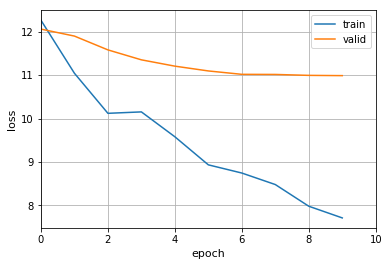

In [21]:
processor.display_fit_result(fitted_model)

test model

Start to create model
Model created
Frames in features01.p : 3000
Records in labels01.p : 3000
Start to split datasets
Split completed
Split result=========================
Shape of trainning set
(2400, 64, 64, 3) (2400, 1)
Shape of test set
(600, 64, 64, 3) (600, 1)
Start training
Train on 1920 samples, validate on 480 samples
Epoch 1/50
1920/1920 [==============================] - 5s - loss: 10.6877 - val_loss: 11.0910
Epoch 2/50
1920/1920 [==============================] - 3s - loss: 10.4957 - val_loss: 10.8692
Epoch 3/50
1920/1920 [==============================] - 3s - loss: 10.4530 - val_loss: 10.9741
Epoch 4/50
1920/1920 [==============================] - 3s - loss: 10.3989 - val_loss: 10.8179
Epoch 5/50
1920/1920 [==============================] - 3s - loss: 10.2718 - val_loss: 10.7341
Epoch 6/50
1920/1920 [==============================] - 3s - loss: 10.1786 - val_loss: 10.6949
Epoch 7/50
1920/1920 [==============================] - 3s - loss: 9.8961 - val_loss: 10.4609
Epoch 

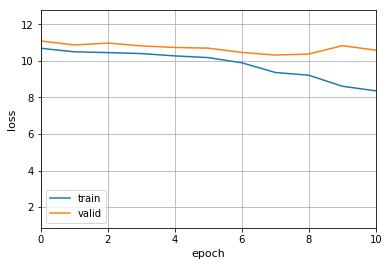

NameError: name 'features' is not defined

In [48]:
model = get_nvidia_model_2()

features_file = utils.join_dir(params.pickle_dir,'features{:0>2}.p'.format(1))
labels_file = utils.join_dir(params.pickle_dir,'labels{:0>2}.p'.format(1))

feature = processor.load_features(features_file,1,need_ori=True)
label = processor.load_labels(labels_file,1,need_ori=True)

fitted_model = processor.fit_model(feature,label,model,epochs=35)
processor.display_fit_result(fitted_model)

model = utils.get_model()
processor.evaluate_final_model(model,features,labels)

In [17]:
processor.save_model(moel)

Model and weights already saved


### Checkpoint 2 is here

Start to create model
Model created
Start to split datasets
Split completed
Split result=========================
Shape of trainning set
(38880, 64, 64, 3) (38880, 1)
Shape of test set
(9720, 64, 64, 3) (9720, 1)
Start training
Train on 31104 samples, validate on 7776 samples
Epoch 1/10
31104/31104 [==============================] - 45s - loss: 20.6348 - val_loss: 20.9098
Epoch 2/10
31104/31104 [==============================] - 44s - loss: 20.2269 - val_loss: 20.6496
Epoch 3/10
31104/31104 [==============================] - 44s - loss: 19.9903 - val_loss: 20.2479
Epoch 4/10
31104/31104 [==============================] - 44s - loss: 19.7684 - val_loss: 19.9616
Epoch 5/10
31104/31104 [==============================] - 44s - loss: 19.6623 - val_loss: 20.2069
Epoch 6/10
31104/31104 [==============================] - 44s - loss: 19.7132 - val_loss: 20.0430
Epoch 7/10
31104/31104 [==============================] - 44s - loss: 19.7691 - val_loss: 20.3281
Epoch 8/10
31104/31104 [=============

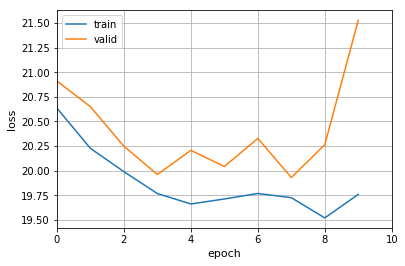

In [8]:
model = get_nvidia_model()
fitted_model = processor.fit_model(all_features,all_labels,model,epochs=10)
processor.display_fit_result(fitted_model)

In [8]:
import processor
import params
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation,Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Flatten
from keras import optimizers

修改模型

In [20]:
from keras.layers.pooling import MaxPooling2D 
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization




## Checkpoint 3 is here

Frames in features10.p : 2700
Records in labels10.p : 2700
Model already exists, do you want to reuse? (y/n): y
Model fetched from the disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 24)        672       
_________________________________________________________________
batch_normalization_11 (Batc (None, 64, 64, 24)        96        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        6944      
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
__

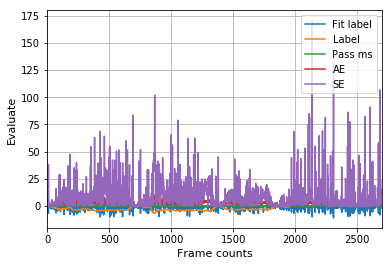

Mean absolute error is 2.476217737530048
Mean squared  error is 9.132384055546577
Mean pass ms is 0.005594835899494313


In [19]:
import utils
import cv2
import params
import matplotlib.pyplot as plt
import time
import processor
import numpy as np

features_file = utils.join_dir(params.pickle_dir,'features10.p')
labels_file = utils.join_dir(params.pickle_dir,'labels10.p')

features = processor.load_features(features_file,10)
labels = processor.load_labels(labels_file,10)

model = utils.get_model()
processor.evaluate_final_model(model,features,labels)


In [3]:
def get_combine_img(need_ori=False):
    video_idx = 10
    imgs = []
    tims_idx = [499,999,1499,1999,2499]
    f = 0
    cap = cv2.VideoCapture(utils.join_dir(params.data_dir,'epoch{:0>2}_front.mkv'.format(video_idx)))

    while True:
        ret, frame = cap.read()
        if not ret:
            break;
        #pre-process
        if f in tims_idx:
            frame = img_pre_process_times(frame,2)
        else:
            frame = processor.img_pre_process(frame,need_ori)
        imgs.append(frame)
        f = f+1
    cap.release()
    return imgs

def img_pre_process_times(img,times):
    for i in range(1,times+1):
        img = processor.change_color_space(img)
        img = processor.translate(img)
        img = processor.resize(img)
    return np.resize(img, (params.FLAGS.img_w, params.FLAGS.img_h, params.FLAGS.img_c))
        
features = get_combine_img()
labels = processor.load_labels(labels_file,10)

processor.evaluate_final_model(model,features,labels)

NameError: name 'np' is not defined

Frames in features10.p : 2700
Records in labels10.p : 2700
Model already exists, do you want to reuse? (y/n): y
Model fetched from the disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_6 (Lambda)            (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 30, 30, 24)        1824      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 36)        21636     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 5, 5, 48)          43248     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 64)          27712     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 1, 1, 64)          36928     
__

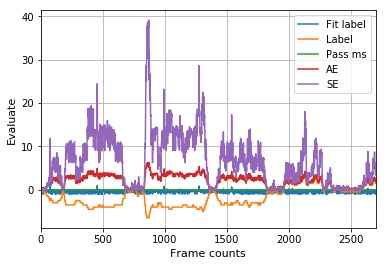

Mean absolute error is 2.182813832748647
Mean squared  error is 6.596677493693317
Mean pass ms is 0.0013908824214228877


In [7]:


features_file = utils.join_dir(params.pickle_dir,'features10.p')
labels_file = utils.join_dir(params.pickle_dir,'labels10.p')

features = processor.load_features(features_file,10)
labels = processor.load_labels(labels_file,10)

model = utils.get_model('model_basic.json','model_basic.h5')

processor.evaluate_final_model(model,features,labels)